In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [133]:
#get the data
data = pd.read_csv('indian_liver_patient.csv')

In [134]:
#Get the Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Observation
    -Total 583 Records
    -Total 11 columns
    -columns of data-types includes int64, float64, object

In [135]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [136]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [137]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

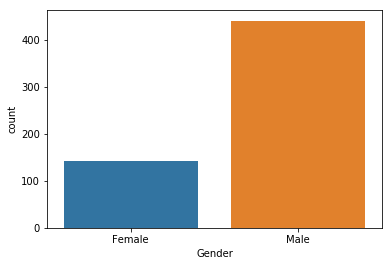

In [138]:
sns.countplot(x='Gender',data=data)

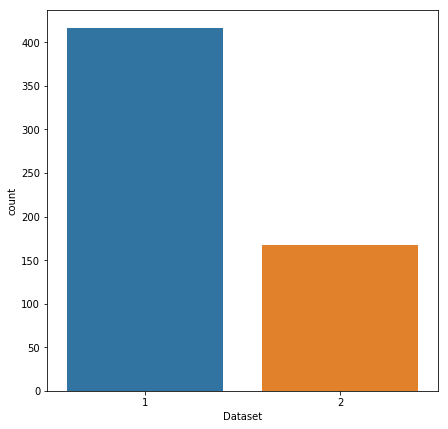

In [139]:
plt.rcParams['figure.figsize']=(7,7)
sns.countplot(x='Dataset',data=data)


### There are only 2 values for Dataset and as given in the description, we will use them as category. We will consider that people with Dataset value =1 has liver disease and Dataset value = 2 has no liver disease

### We will do some analysis based on the Dataset value

In [140]:
people_with_liver_disease = np.sum(data['Dataset'] == 1)
print('Total people(%) with liver disease are',np.sum(data['Dataset'] == 1) / len(data) * 100) 

Total people(%) with liver disease are 71.3550600343


In [141]:
print('Total Females(%) with liver disease are',np.sum((data['Gender'] == 'Female') & (data['Dataset'] == 1)) / people_with_liver_disease * 100) 

Total Females(%) with liver disease are 22.1153846154


In [142]:
print('Total Males(%) with liver disease are',np.sum((data['Gender'] == 'Male') & (data['Dataset'] == 1)) / people_with_liver_disease * 100) 

Total Males(%) with liver disease are 77.8846153846


### Convert the data to dataframe 

In [143]:
df = pd.DataFrame(data)

In [144]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [145]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [146]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

### Obeservation:
    -total male records 441 (~75%)
    -total female records 142 (~25%)
    -416 people in category 1 (~71%)
    -167 people in category 2 (~29%)

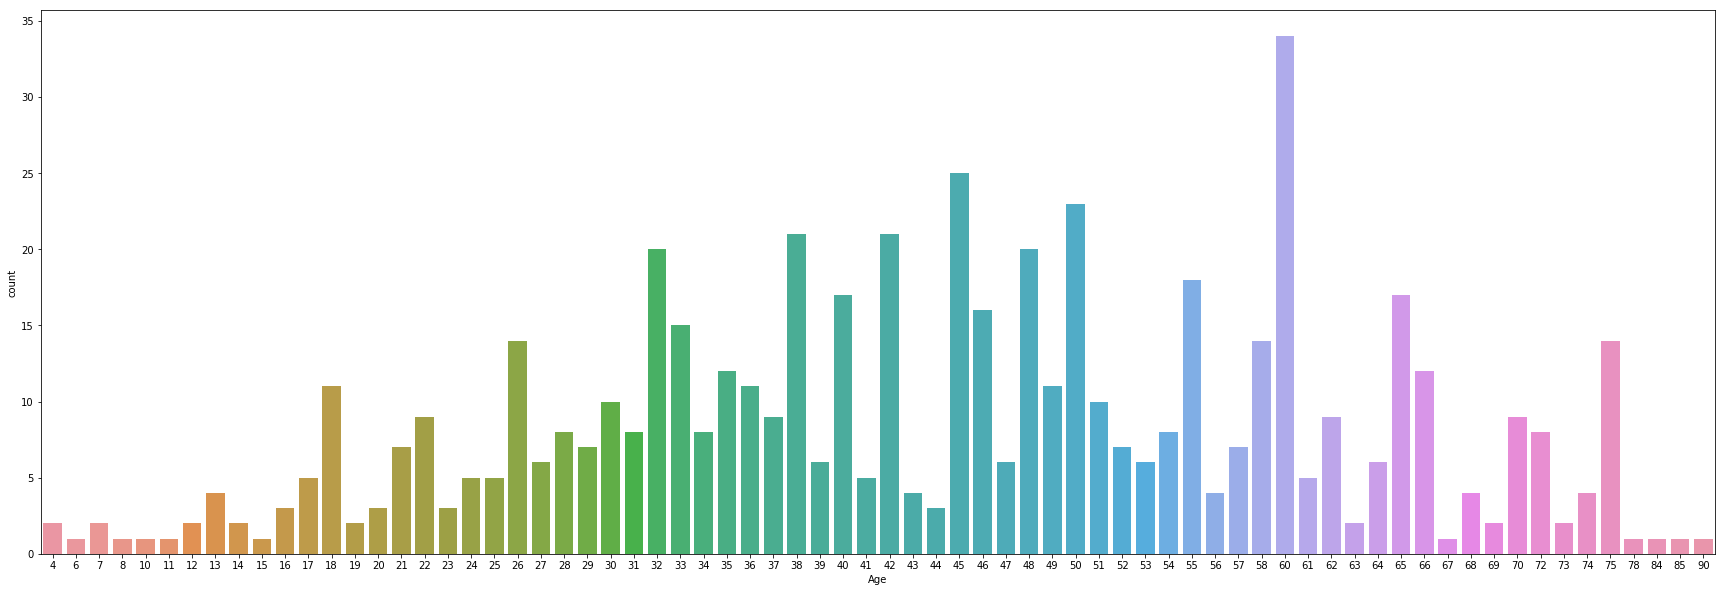

In [147]:
plt.rcParams['figure.figsize']=(30,10)
sns.countplot(x='Age',data = df)

### Implementing Machine Learning Models

In [148]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


In [149]:
X = df


In [150]:
Y = df['Dataset']
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     1
11     1
12     2
13     1
14     1
15     2
16     1
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     2
29     2
      ..
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    2
565    1
566    2
567    1
568    1
569    1
570    1
571    1
572    1
573    1
574    1
575    1
576    1
577    1
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [151]:
type(X)

pandas.core.frame.DataFrame

In [152]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [153]:
X.drop(['Dataset'],axis = 1,inplace=True)

In [154]:
X

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00


In [155]:
rfe = RFE(logreg, 18)

In [156]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.6+ KB


In [157]:
X['gen'] = np.where(df['Gender'] =='Male','1','0')

In [158]:
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,gen
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [159]:
X.drop(['Gender'],axis = 1,inplace = True)

In [160]:
np.isnan(X['Alamine_Aminotransferase']).value_counts()

False    583
Name: Alamine_Aminotransferase, dtype: int64

In [161]:
X.fillna(0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,gen
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [162]:
X.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
gen                           0
dtype: int64

In [163]:
X['Albumin_and_Globulin_Ratio']=X['Albumin_and_Globulin_Ratio'].fillna(0)

In [164]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,gen
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [167]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [168]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=18, step=1, verbose=0)

In [169]:
y_pred = rfe.predict(X_test
                    )

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[111,  11],
       [ 46,   7]], dtype=int64)

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.71      0.91      0.80       122
          2       0.39      0.13      0.20        53

avg / total       0.61      0.67      0.61       175

0.674285714286


In [176]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, oob_score=True)

In [177]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [180]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test,predicted)
accuracy

0.68571428571428572